In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Google_Stock_Price_Train.csv', thousands=',')
data = data[['Date', 'Close']]
data['Close'] = data['Close'].apply(lambda x: float(x))
data.head(n=10)

,Date,Close
0,1/3/2012,663.59
1,1/4/2012,666.45
2,1/5/2012,657.21
3,1/6/2012,648.24
4,1/9/2012,620.76
5,1/10/2012,621.43
6,1/11/2012,624.25
7,1/12/2012,627.92
8,1/13/2012,623.28
9,1/17/2012,626.86


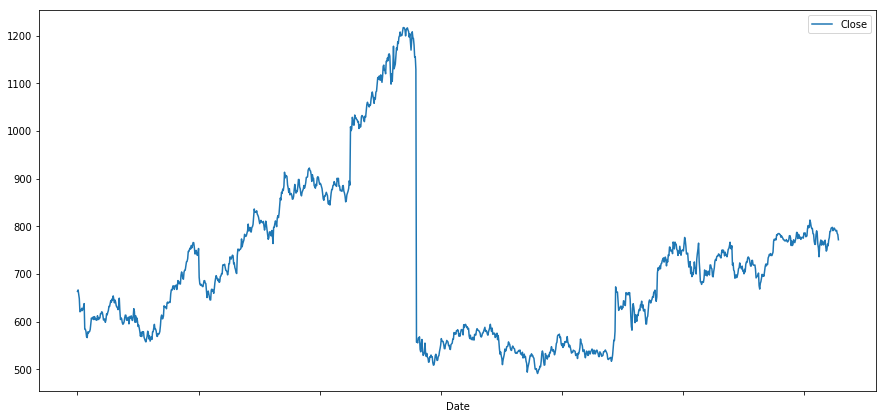

In [3]:
data.plot(y='Close',x='Date', figsize=(15, 7))
plt.show()

### Take Fourier transform

In [4]:
close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
#fft_df.sort_values(by=['abs'], ascending=False, inplace=True)
#fft_df.reset_index(inplace=True)
#fft_df.drop(columns=['index'], inplace=True)
fft_df.head(n=20)

,fft,absolute,angle
0,(896538.4400000001+0j),896538.440000,0.000000
1,(-7215.392585024199-65304.1585377325j),65701.560198,-1.680839
2,(-21359.993676414684+96350.52413785917j),98689.780786,1.788958
3,(19822.755415313477-18625.453824800636j),27200.168427,-0.754268
4,(-18632.877169558848+19205.585533733294j),26758.898096,2.341060
5,(33822.162795483324+10151.94136866995j),35312.895799,0.291600
6,(-23444.20081620714+2145.3475771380945j),23542.155129,3.050338
7,(16106.16726097875+23327.30845890625j),28347.344563,0.966514
8,(-4784.043222259192-22637.70715712256j),23137.693379,-1.779063
9,(-4441.009768748934+19235.29987625343j),19741.310217,1.797699


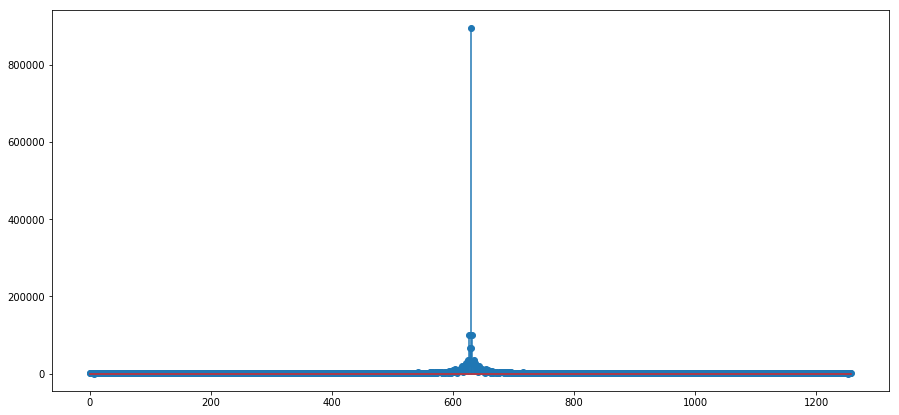

In [5]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(15, 7))
plt.stem(items)
plt.show()

### Reproducing the signal

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


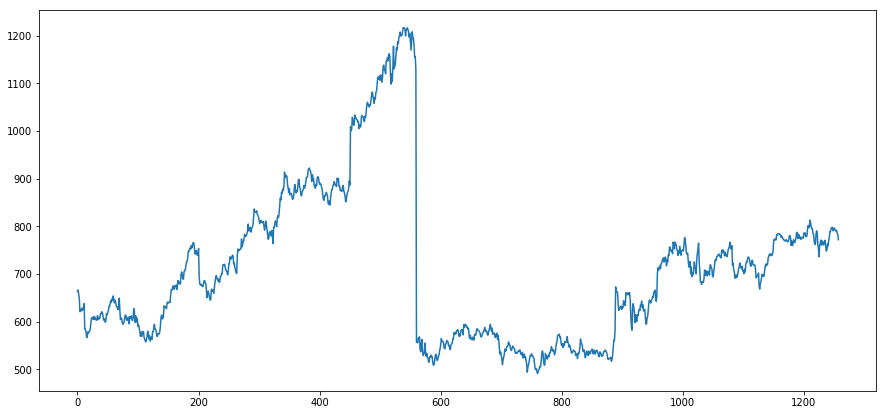

In [6]:
# take all components

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(np.asarray(fft_df['fft'].tolist())))
plt.show()

### Low-pass filtering

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


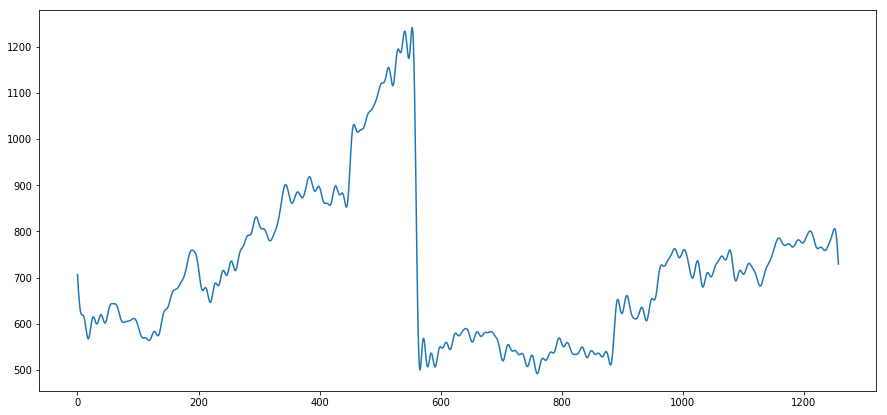

In [7]:
# take only 200 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[100:-100] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


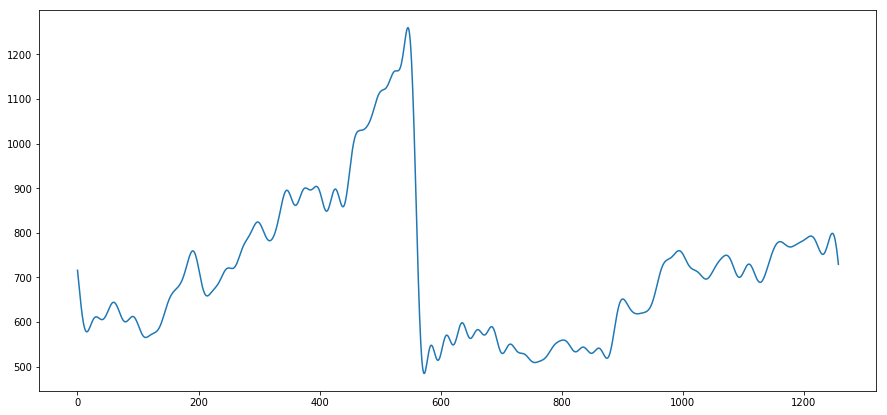

In [8]:
# take only 100 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[50:-50] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


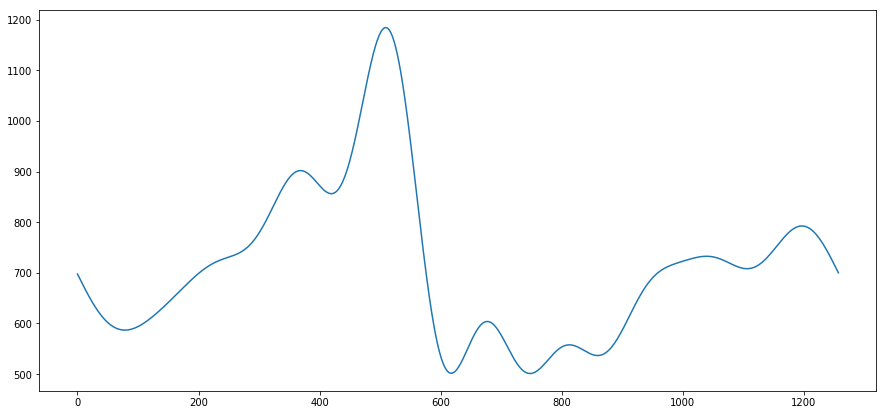

In [9]:
# take only 20 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[10:-10] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


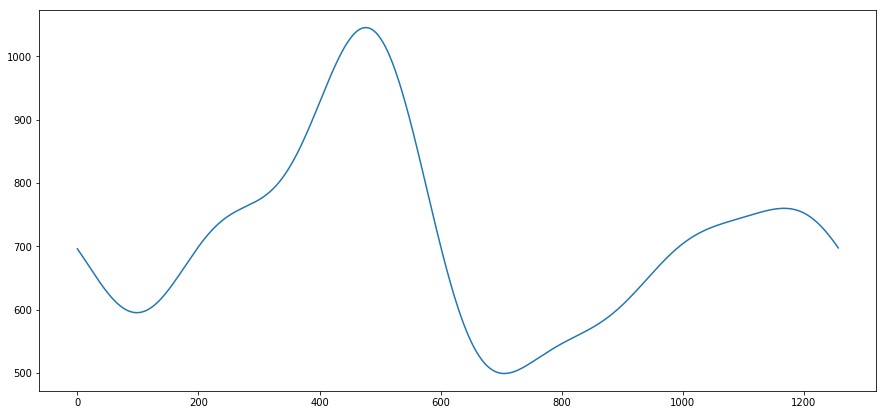

In [10]:
# take only 10 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[5:-5] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()